In [22]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [23]:
df = pd.read_csv("train.csv", sep=',')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
#For test
df_test = pd.read_csv("test.csv", sep=',')
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
df_result = pd.read_csv("gender_submission.csv", sep=',')
df_result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
df_test['Survived'] = df_result['Survived']
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


# Preprocessing of Data

Removing useless columns like name, Cabin, SibSP, Parch, Ticket, Embarked because they dont seem to be the reason on which the survival of the passenger depends.

In [27]:
df = df.drop(['Cabin','PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1)

In [28]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [29]:
df_test = df_test.drop(['Cabin','PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1)

In [30]:
df_test

,Pclass,Sex,Age,Fare,Survived
0,3,male,34.5,7.8292,0
1,3,female,47.0,7.0000,1
2,2,male,62.0,9.6875,0
3,3,male,27.0,8.6625,0
4,3,female,22.0,12.2875,1
...,...,...,...,...,...
413,3,male,NaN,8.0500,0
414,1,female,39.0,108.9000,1
415,3,male,38.5,7.2500,0
416,3,male,NaN,8.0500,0


Deleting all the rows which does not have data available in them

In [31]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [32]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


In [33]:
df_test.dropna(inplace=True)
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [34]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


We will now change the categorical variables to numeric values for the column 'Sex'

In [35]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [36]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
885,0,3,0,39.0,29.1250
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
889,1,1,1,26.0,30.0000


In [37]:
label_encoder = LabelEncoder()
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])

In [38]:
df_test


,Pclass,Sex,Age,Fare,Survived
0,3,1,34.5,7.8292,0
1,3,0,47.0,7.0000,1
2,2,1,62.0,9.6875,0
3,3,1,27.0,8.6625,0
4,3,0,22.0,12.2875,1
...,...,...,...,...,...
409,3,0,3.0,13.7750,1
411,1,0,37.0,90.0000,1
412,3,0,28.0,7.7750,1
414,1,0,39.0,108.9000,1


Remove the survived column from the data frame and set it as target in a different data frame

In [39]:
x_train = df.drop('Survived', axis=1)
y_train = df['Survived']

In [40]:
y_test = df_test['Survived']
x_test = df_test.drop('Survived', axis=1)

# Plotting the decision Tree

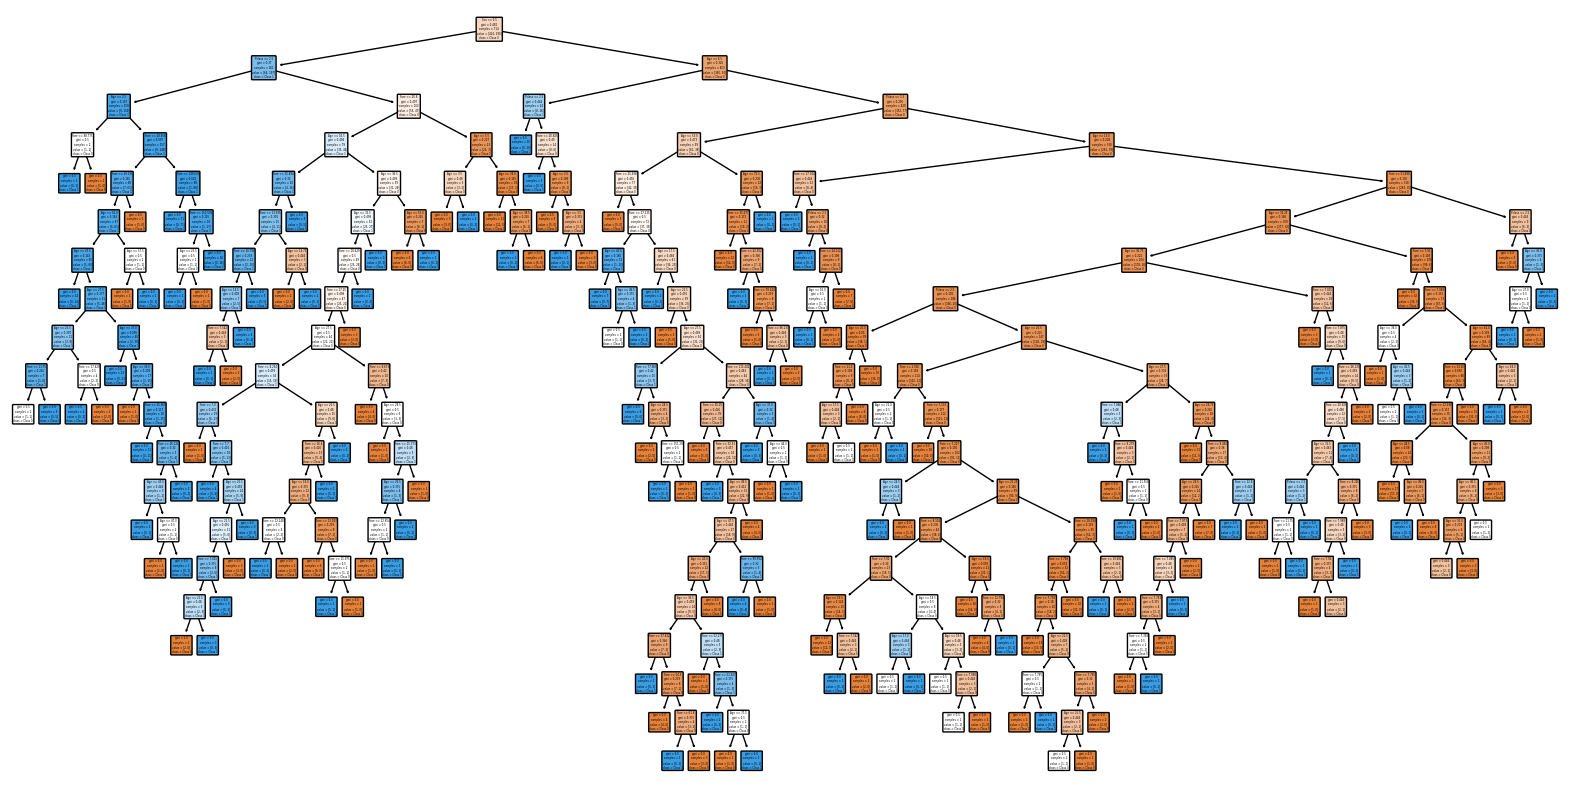

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
myTree = DecisionTreeClassifier(random_state=0)
myTree.fit(x_train,y_train)
plt.figure(figsize=(20, 10))
plot_tree(myTree, filled=True, rounded=True, feature_names=x_train.columns.tolist(), class_names=['Class 0', 'Class 1'])
plt.show()

# 5 Fold Verification for Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a Decision Tree model
myTree = DecisionTreeClassifier(random_state=0)

# Train the model on the training set
myTree.fit(x_train, y_train)

# Evaluate on the test set
test_accuracy = myTree.score(x_test, y_test)

train_accuracy = myTree.score(x_train, y_train)
# Perform five-fold cross-validation on the training set and get accuracy scores
cv_scores = cross_val_score(myTree, x_train, y_train, cv=5, scoring='accuracy')

# Calculate average classification accuracy from cross-validation
average_cv_accuracy = np.mean(cv_scores)

print("Accuracy on train is", f"{train_accuracy * 100:.2f}%", "and on test is", f"{test_accuracy * 100:.2f}%")
print("Average Cross-Validation Accuracy:", f"{average_cv_accuracy * 100:.2f}%")


Accuracy on train is 98.46% and on test is 77.04%
Average Cross-Validation Accuracy: 76.48%


# 5 Fold Verification for Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

myRandomForest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)  # replace with your parameters

myRandomForest.fit(x_train, y_train)

cv_scores_rf = cross_val_score(myRandomForest, x_train, y_train, cv=5, scoring='accuracy')

average_cv_accuracy_rf = np.mean(cv_scores_rf)

test_accuracy_rf = myRandomForest.score(x_test, y_test)
print("Accuracy on the Test Set (Random Forest):", f"{test_accuracy_rf * 100:.2f}%")
print("Average Cross-Validation Accuracy (Random Forest):", f"{average_cv_accuracy_rf * 100:.2f}%")

Accuracy on the Test Set (Random Forest): 87.31%
Average Cross-Validation Accuracy (Random Forest): 81.52%
